In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



import random

import warnings

warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/1year.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Display the original DataFrame
print("Original DataFrame:")
print(data)

# Step 2: Keep only the first 10 columns
columns_to_keep = list(data.columns[:10]) + [data.columns[-1]]
data = data[columns_to_keep]

# Display the modified DataFrame
print("\nDataFrame with only the first 10 columns:")
print(data)

# Step 3: Save the modified DataFrame back to a CSV file
output_file_path = 'modified_file.csv'  # Replace with the desired output file path
data.to_csv(output_file_path, index=False)


Original DataFrame:
          Attr1     Attr2      Attr3    Attr4    Attr5     Attr6      Attr7  \
0       0.20055   0.37951    0.39641   2.0472   32.351   0.38825    0.24976   
1       0.20912   0.49988    0.47225   1.9447   14.786         0    0.25834   
2       0.24866   0.69592    0.26713   1.5548  -1.1523         0    0.30906   
3      0.081483   0.30734    0.45879   2.4928   51.952   0.14988   0.092704   
4       0.18732   0.61323     0.2296   1.4063  -7.3128   0.18732    0.18732   
...         ...       ...        ...      ...      ...       ...        ...   
7007   0.038665  0.071884    0.48884   7.8004   221.01  0.038665   0.045892   
7008   0.001091    0.8516   0.003463   1.0086  -44.467  0.086248   0.001091   
7009  -0.091442    0.7055  -0.047216  0.92568  -7.2952         0  -0.090374   
7010    0.13809    3.3357     -2.364  0.29128  -88.382   -3.3963    0.13809   
7011   0.098271    0.8333   0.000426   1.0005  -43.191         0    0.12838   

         Attr8   Attr9   Attr10

In [ ]:
#data=pd.read_csv("/content/drive/MyDrive/1year.csv")

data.head()
#,usecols=['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10']


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0


In [ ]:
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0
...,...,...,...,...,...,...,...,...,...,...,...
7007,0.038665,0.071884,0.48884,7.8004,221.01,0.038665,0.045892,11.068,1.0765,0.7956,1
7008,0.001091,0.8516,0.003463,1.0086,-44.467,0.086248,0.001091,0.17429,1.0297,0.14842,1
7009,-0.091442,0.7055,-0.047216,0.92568,-7.2952,0,-0.090374,0.41744,9.1345,0.2945,1
7010,0.13809,3.3357,-2.364,0.29128,-88.382,-3.3963,0.13809,-0.70021,9.9852,-2.3357,1


In [ ]:
print("Shape of Data:",data.shape)
r,c=data.shape
print("Number of Rows:",r)
print("Number of columns:",c)

Shape of Data: (7012, 11)
Number of Rows: 7012
Number of columns: 11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   7012 non-null   object
 1   Attr2   7012 non-null   object
 2   Attr3   7012 non-null   object
 3   Attr4   7012 non-null   object
 4   Attr5   7012 non-null   object
 5   Attr6   7012 non-null   object
 6   Attr7   7012 non-null   object
 7   Attr8   7012 non-null   object
 8   Attr9   7012 non-null   object
 9   Attr10  7012 non-null   object
 10  class   7012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 602.7+ KB


In [ ]:
data.shape


(7012, 11)

In [ ]:
data.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
class     0
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
(data.eq('?')).any()

Attr1      True
Attr2      True
Attr3      True
Attr4      True
Attr5      True
Attr6      True
Attr7      True
Attr8      True
Attr9      True
Attr10     True
class     False
dtype: bool

In [ ]:
data.replace("?",np.NAN,inplace=True)

In [ ]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0


In [ ]:
data.replace('?',np.NAN,inplace=True)

In [ ]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0


In [ ]:
data.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
Attr6      3
Attr7      3
Attr8     25
Attr9      1
Attr10     3
class      0
dtype: int64

In [ ]:
data.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
Attr6      3
Attr7      3
Attr8     25
Attr9      1
Attr10     3
class      0
dtype: int64

In [ ]:
data.isnull().sum().sum()

82

In [ ]:
data.isnull().any()


Attr1      True
Attr2      True
Attr3      True
Attr4      True
Attr5      True
Attr6      True
Attr7      True
Attr8      True
Attr9      True
Attr10     True
class     False
dtype: bool

In [ ]:
print(data.isnull().any())

Attr1      True
Attr2      True
Attr3      True
Attr4      True
Attr5      True
Attr6      True
Attr7      True
Attr8      True
Attr9      True
Attr10     True
class     False
dtype: bool


In [ ]:
[ data[i].isnull().sum() for i in data.columns]

[3, 3, 3, 30, 8, 3, 3, 25, 1, 3, 0]

In [ ]:
print("Shape of Data:",data.shape)
r,c=data.shape
print("Number of Rows:",r)
print("Number of columns:",c)

Shape of Data: (7012, 11)
Number of Rows: 7012
Number of columns: 11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   7009 non-null   object
 1   Attr2   7009 non-null   object
 2   Attr3   7009 non-null   object
 3   Attr4   6982 non-null   object
 4   Attr5   7004 non-null   object
 5   Attr6   7009 non-null   object
 6   Attr7   7009 non-null   object
 7   Attr8   6987 non-null   object
 8   Attr9   7011 non-null   object
 9   Attr10  7009 non-null   object
 10  class   7012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 602.7+ KB


In [ ]:
data.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
Attr6      3
Attr7      3
Attr8     25
Attr9      1
Attr10     3
class      0
dtype: int64

In [ ]:
data.isnull().sum().sum()

82

In [ ]:
(data.eq('?')).any()

Attr1     False
Attr2     False
Attr3     False
Attr4     False
Attr5     False
Attr6     False
Attr7     False
Attr8     False
Attr9     False
Attr10    False
class     False
dtype: bool

In [ ]:
data.replace("?",np.NaN,inplace=True)


In [ ]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0


In [ ]:
[ data[i].isnull().sum() for i in data.columns]

[3, 3, 3, 30, 8, 3, 3, 25, 1, 3, 0]

In [ ]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0


In [ ]:
data.replace('?',np.NAN,inplace=True)

In [ ]:
data.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
Attr6      3
Attr7      3
Attr8     25
Attr9      1
Attr10     3
class      0
dtype: int64

In [ ]:
data.isnull().sum().sum()

82

In [ ]:
data.isnull().sum().sum()

82

In [ ]:
data.update(data[['Attr1','Attr2','Attr3','Attr4','Attr5','Attr6','Attr7','Attr8','Attr9','Attr10']].fillna(0))

In [ ]:
#data.fillna(method='ffill',inplace=True)

In [ ]:
data=data.fillna(data.mean())

In [ ]:
data.mean()

class    0.036509
dtype: float64

In [ ]:
[ data[i].isnull().sum() for i in data.columns]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
{column:len(data[column].unique()) for column in data.columns}

{'Attr1': 6618,
 'Attr2': 6593,
 'Attr3': 6691,
 'Attr4': 6274,
 'Attr5': 6806,
 'Attr6': 4202,
 'Attr7': 6661,
 'Attr8': 6671,
 'Attr9': 5500,
 'Attr10': 6621,
 'class': 2}

In [ ]:
print("Information about the dataset")
data.info()

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   7012 non-null   object
 1   Attr2   7012 non-null   object
 2   Attr3   7012 non-null   object
 3   Attr4   7012 non-null   object
 4   Attr5   7012 non-null   object
 5   Attr6   7012 non-null   object
 6   Attr7   7012 non-null   object
 7   Attr8   7012 non-null   object
 8   Attr9   7012 non-null   object
 9   Attr10  7012 non-null   object
 10  class   7012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 602.7+ KB


array([[<Axes: title={'center': 'class'}>]], dtype=object)

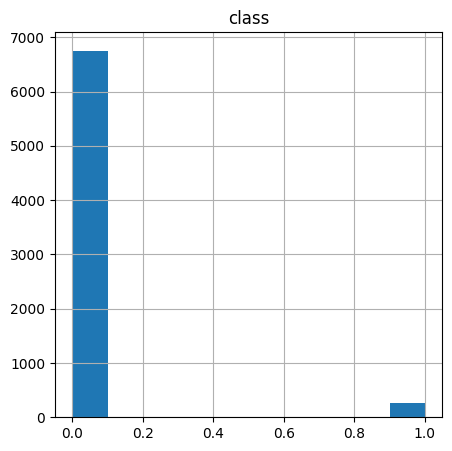

In [ ]:
data.hist(figsize=(5,5))

In [ ]:
X=data.drop(["class"],axis=1)

In [ ]:
X

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677
...,...,...,...,...,...,...,...,...,...,...
7007,0.038665,0.071884,0.48884,7.8004,221.01,0.038665,0.045892,11.068,1.0765,0.7956
7008,0.001091,0.8516,0.003463,1.0086,-44.467,0.086248,0.001091,0.17429,1.0297,0.14842
7009,-0.091442,0.7055,-0.047216,0.92568,-7.2952,0,-0.090374,0.41744,9.1345,0.2945
7010,0.13809,3.3357,-2.364,0.29128,-88.382,-3.3963,0.13809,-0.70021,9.9852,-2.3357


In [ ]:
y=data["class"]

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7007    1
7008    1
7009    1
7010    1
7011    1
Name: class, Length: 7012, dtype: int64

In [ ]:
 X_scaled=pd.DataFrame(StandardScaler(copy=False).fit_transform(X))
 X_scaled.columns=X.columns

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
data.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
class     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)


In [ ]:
# Check for NaN values after imputation
#print(np.isnan(X_scaled_imputed).sum())


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_sm, y_sm = sm.fit_resample(X_scaled_imputed, y)

print(f'''shape of X before SMOTE: {X_scaled_imputed.shape}
             shape of X after SMOTE: {X_sm.shape}''')


shape of X before SMOTE: (7012, 10)
             shape of X after SMOTE: (13512, 10)


In [ ]:

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled_imputed)

# Step 2: Apply SMOTE
sm = SMOTE(random_state=123)
X_sm, y_sm = sm.fit_resample(X_scaled_imputed, y)

# Step 3: Print shapes before and after SMOTE
print(f'Shape of X before SMOTE: {X_scaled_imputed.shape}')
print(f'Shape of X after SMOTE: {X_sm.shape}\n')

# Step 4: Print target class distribution before and after SMOTE
print('Target class distribution before SMOTE:\n', y.value_counts(normalize=True))
print('Target class distribution after SMOTE:\n', pd.Series(y_sm).value_counts(normalize=True))


Shape of X before SMOTE: (7012, 10)
Shape of X after SMOTE: (13512, 10)

Target class distribution before SMOTE:
 0    0.963491
1    0.036509
Name: class, dtype: float64
Target class distribution after SMOTE:
 0    0.5
1    0.5
Name: class, dtype: float64


In [ ]:
data.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
class     0
dtype: int64

In [ ]:
# X_scaled=pd.DataFrame(StandardScaler(copy=False).fit_transform(X))
# X_scaled.columns=X.columns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X is your original DataFrame
# X = ...

# Use StandardScaler to scale the data
scaler = StandardScaler(copy=False)
X_scaled_array = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)


In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Attr1  Attr2  Attr3  Attr4  Attr5  Attr6  Attr7  Attr8  Attr9  Attr10  \
0     False  False  False  False  False  False  False  False  False   False   
1     False  False  False  False  False  False  False  False  False   False   
2     False  False  False  False  False  False  False  False  False   False   
3     False  False  False  False  False  False  False  False  False   False   
4     False  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
7007  False  False  False  False  False  False  False  False  False   False   
7008  False  False  False  False  False  False  False  False  False   False   
7009  False  False  False  False  False  False  False  False  False   False   
7010  False  False  False  False  False  False  False  False  False   False   
7011  False  False  False  False  False  False  False  False  False   False   

      class  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
7007  False  
7008  False  
7009  False  
7010  False  
7011  False  

[7012 rows x 11 columns]>

In [ ]:
X=data.drop(["class"],axis=1)

In [ ]:
X

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677
...,...,...,...,...,...,...,...,...,...,...
7007,0.038665,0.071884,0.48884,7.8004,221.01,0.038665,0.045892,11.068,1.0765,0.7956
7008,0.001091,0.8516,0.003463,1.0086,-44.467,0.086248,0.001091,0.17429,1.0297,0.14842
7009,-0.091442,0.7055,-0.047216,0.92568,-7.2952,0,-0.090374,0.41744,9.1345,0.2945
7010,0.13809,3.3357,-2.364,0.29128,-88.382,-3.3963,0.13809,-0.70021,9.9852,-2.3357


In [ ]:
y=data['class']

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7007    1
7008    1
7009    1
7010    1
7011    1
Name: class, Length: 7012, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.3)

In [ ]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)


Shape of X_train: (9458, 10)
Shape of y_train: (9458,)
Shape of X_test: (4054, 10)
Shape of y_test: (4054,)


In [ ]:
X.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
dtype: int64

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred_svc=svm.predict(X_test)

In [ ]:
print('Training set:',svm.score(X_train,y_train))
print('Testing Set:',svm.score(X_test,y_test))

Training set: 0.6580672446606047
Testing Set: 0.6551554020720276


In [ ]:
accuracy_SVC=svm.score(X_test,y_test)
print('Accuracy_SVM:',accuracy_SVC*100)

Accuracy_SVM: 65.51554020720276


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Now you can create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [ ]:
dt.fit(X_train,y_train)



DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
print('Training set:',dt.score(X_train,y_train))
print('Test Set:',dt.score(X_test,y_test))

Training set: 0.9998942694015648
Test Set: 0.8882585101134681


In [ ]:
from sklearn import metrics

# Now you can use functions and objects from the metrics module

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_dt)*100)

Accuracy: 88.82585101134681


In [ ]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('Accuracy DT:',accuracy_dt*100)

Accuracy DT: 88.82585101134681


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Now you can use RandomForestClassifier in your code


rand_forest=RandomForestClassifier(random_state=42)

In [ ]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictioRF=rand_forest.predict(X_test)
print('Training set:',rand_forest.score(X_train,y_train))
print('Testing set:',rand_forest.score(X_test,y_test))

Training set: 0.9998942694015648
Testing set: 0.9467192895905279


In [ ]:
accuracy_RF=rand_forest.score(X_test,y_test)
print("Accurarcy_RF:",accuracy_RF*100)

Accurarcy_RF: 94.67192895905279


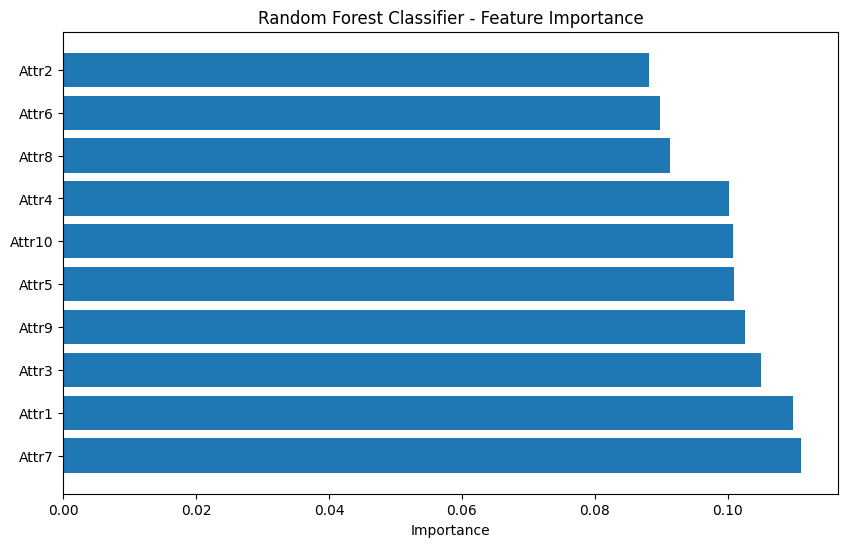

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rand_forest.fit(X, y)

# Get feature importances
feature_importances = rand_forest.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

In [ ]:
feature_importance_df[1:11]

,Feature,Importance
0,Attr1,0.109810
2,Attr3,0.105056
8,Attr9,0.102570
4,Attr5,0.101033
9,Attr10,0.100862
3,Attr4,0.100235
7,Attr8,0.091357
5,Attr6,0.089766
1,Attr2,0.088180


Comparison of Accuracies

In [ ]:
#df=data[['Attr46','Attr11','Attr29','Attr21','Attr34','Attr24','Attr40','Attr22','Attr58','Attr48']]


In [ ]:
#X=df
#y=data[['class']]

In [ ]:
accuracy_df=pd.DataFrame({
    'Model':['SVM','DecisionTree','Randomforest'],
    'Accuracy':[accuracy_SVC*100,accuracy_dt*100,accuracy_RF*100]
})
print(accuracy_df)

          Model   Accuracy
0           SVM  65.515540
1  DecisionTree  88.825851
2  Randomforest  94.671929


Text(0, 0.5, 'Accuracy')

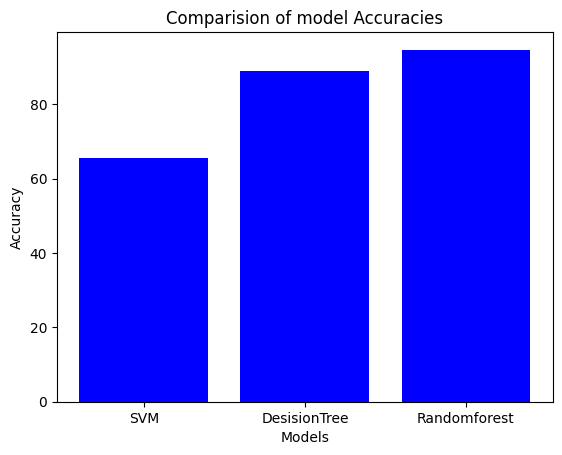

In [ ]:
models=['SVM','DesisionTree','Randomforest']
accuracies=[accuracy_SVC*100,accuracy_dt*100,accuracy_RF*100]
plt.bar(models,accuracies,color='blue')
plt.title('Comparision of model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

In [ ]:
import pickle
pickle.dump(rand_forest,open('model.pkl','wb'))

In [ ]:
model=pickle.load(open("/content/model.pkl",'rb'))
print(model.predict([[0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494]]))

[0]
